## Estatísticas sobre o naufrágio do RMS Titanic
Considerações:
- Classe social
- Sexo
- Idade
- Quantidade de irmãos / esposas
- Quantidade de filhos

In [ ]:
import pandas as pd

df = pd.read_csv('./shipwreck_rms_titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Remoção de colunas: Ticket, Fare, Cabin e Embarked.

In [ ]:
df.drop(['Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


Média de sobreviventes divida por classe social, sexo, idade, quantidade de irmãos / esposa e quantidade de filhos

In [ ]:
import numpy as np

df["Survived"] = pd.to_numeric(df["Survived"], errors="coerce")

# Remover linhas sem idade
df = df.dropna(subset=["Age"]).copy()

# Bins (inclui infinito para não sobrar fora da faixa)
bins = [0, 12, 18, 30, 50, np.inf]
labels = ["Criança", "Adolescente", "Jovem Adulto", "Adulto", "Idoso"]

# Criar faixa etária
df["Faixa_Idade"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)

# Agrupar e tirar a média (taxa de sobrevivência)
taxa_sobrevivencia = (
    df.groupby(["Pclass", "Sex", "Faixa_Idade", "SibSp", "Parch"], observed=True)["Survived"]
       .mean()
       .reset_index()
)

print(taxa_sobrevivencia.head(40))


    Pclass     Sex   Faixa_Idade  SibSp  Parch  Survived
0        1  female       Criança      1      2  0.000000
1        1  female   Adolescente      0      0  1.000000
2        1  female   Adolescente      0      1  1.000000
3        1  female   Adolescente      0      2  1.000000
4        1  female   Adolescente      1      0  1.000000
5        1  female   Adolescente      1      2  1.000000
6        1  female   Adolescente      2      2  1.000000
7        1  female  Jovem Adulto      0      0  1.000000
8        1  female  Jovem Adulto      0      1  1.000000
9        1  female  Jovem Adulto      0      2  1.000000
10       1  female  Jovem Adulto      1      0  1.000000
11       1  female  Jovem Adulto      1      2  0.000000
12       1  female  Jovem Adulto      2      2  1.000000
13       1  female  Jovem Adulto      3      2  1.000000
14       1  female        Adulto      0      0  0.928571
15       1  female        Adulto      0      1  1.000000
16       1  female        Adult

### Observações:

**Classe social (Pclass)**

- 1ª classe → maior índice de sobrevivência.
- 3ª classe → maioria morreu; poucos sobreviveram.

**Sexo (Sex)**

- Mulheres sobreviveram em proporção muito maior que homens.
- Isso reflete a regra “women and children first” aplicada nos botes.

**Idade (Faixa_Idade)**

- Crianças tiveram chances relativamente maiores de sobreviver, principalmente na 1ª e 2ª classe.
- Adultos homens da 3ª classe foram os mais prejudicados.

**SibSp (Irmãos/Cônjuges a bordo)**

- Ter 1 familiar próximo (irmão ou cônjuge) aumentou as chances, indicando que famílias podiam se ajudar.
- Muitos familiares (≥3) reduziam as chances — dificuldade em embarcar todos.

**Parch (Pais/Filhos a bordo)**

- Crianças acompanhadas tiveram taxa de sobrevivência maior (provavelmente salvas junto aos pais).
- Passageiros sozinhos ou com famílias grandes tiveram menor taxa.

<br>

### Resumindo:
Sobreviveram majoritariamente mulheres e crianças da 1ª e 2ª classe, com famílias pequenas. Homens adultos da 3ª classe foram os que mais morreram.

## Estatísticas sobre Airbnbs em New York City

In [ ]:
import pandas as pd

df = pd.read_csv('./airbnbs_nyc.csv')

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,285.0,30,9,2018-10-19,0.08,6,347,0,NaN
1,2595,Skylit Midtown Manhattan Spacious Studio,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,0.26,3,312,0,NaN
2,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,215.0,30,4,2023-08-20,0.03,1,80,0,NaN
3,6848,Only 2 stops to Manhattan studio,15991,Allen,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,97.0,30,196,2025-06-09,1.00,1,219,4,NaN
4,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kahshanna,Manhattan,East Harlem,40.80107,-73.94255,Private room,NaN,30,1,2022-06-05,0.03,2,2,0,NaN


In [ ]:
# Removendo licenças, informações generalizadas ou duplicadas, e coordenadas
df.drop('neighbourhood', axis=1, inplace=True)
df.drop('latitude', axis=1, inplace=True)
df.drop('longitude', axis=1, inplace=True)
df.drop('license', axis=1, inplace=True)
df.drop('last_review', axis=1, inplace=True)
df.drop('reviews_per_month', axis=1, inplace=True)
df.drop('number_of_reviews_ltm', axis=1, inplace=True)
df.drop('calculated_host_listings_count', axis=1, inplace=True)

# Removendo valores nulos e substituindo-os por 0
df.dropna()
df.fillna(0)

,id,name,host_id,host_name,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Private room,285.0,30,9,347
1,2595,Skylit Midtown Manhattan Spacious Studio,2845,Jennifer,Manhattan,Entire home/apt,240.0,30,49,312
2,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Rebecca,Brooklyn,Entire home/apt,215.0,30,4,80
3,6848,Only 2 stops to Manhattan studio,15991,Allen,Brooklyn,Entire home/apt,97.0,30,196,219
4,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kahshanna,Manhattan,Private room,0.0,30,1,2
...,...,...,...,...,...,...,...,...,...,...
36317,1437489193231265423,Charming 1 br Retreat 2 min UBS,339584418,Adetunji,Queens,Entire home/apt,134.0,30,0,365
36318,1437558502175065750,"Blueground | Hell's Kitchen, BBQ, nr Hudson River",107434423,Blueground,Manhattan,Entire home/apt,649.0,30,0,306
36319,1437716663281487811,Beautiful 1-bedroom Apartment,247439246,Charlene,Manhattan,Entire home/apt,259.0,30,0,320
36320,1437717590842865352,Spacious Comfort Beach-Walk,699701332,Adepeju,Queens,Private room,67.0,30,0,365


In [ ]:
# Traduzindo títulos para português
df.rename(columns={"name": "titulo"}, inplace=True)
df.rename(columns={"host_id": "ID_anfitriao"}, inplace=True)
df.rename(columns={"host_name": "nome_anfitriao"}, inplace=True)
df.rename(columns={"neighbourhood_group": "bairro"}, inplace=True)
df.rename(columns={"room_type": "acomodacao"}, inplace=True)
df.rename(columns={"price": "preco"}, inplace=True)
df.rename(columns={"minimum_nights": "noites_minimas"}, inplace=True)
df.rename(columns={"number_of_reviews": "numero_reviews"}, inplace=True)
df.rename(columns={"availability_365": "disponibilidade_365"}, inplace=True)

df.head()

,id,titulo,ID_anfitriao,nome_anfitriao,bairro,acomodacao,preco,noites_minimas,numero_reviews,disponibilidade_365
0,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Private room,285.0,30,9,347
1,2595,Skylit Midtown Manhattan Spacious Studio,2845,Jennifer,Manhattan,Entire home/apt,240.0,30,49,312
2,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Rebecca,Brooklyn,Entire home/apt,215.0,30,4,80
3,6848,Only 2 stops to Manhattan studio,15991,Allen,Brooklyn,Entire home/apt,97.0,30,196,219
4,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kahshanna,Manhattan,Private room,NaN,30,1,2


In [ ]:
# Cálculo de frequência de Airbnbs em determinados bairros

contagem_brooklyn = df['bairro'].value_counts()

print(contagem_brooklyn)

bairro
Manhattan        16081
Brooklyn         13329
Queens            5355
Bronx             1192
Staten Island      365
Name: count, dtype: int64


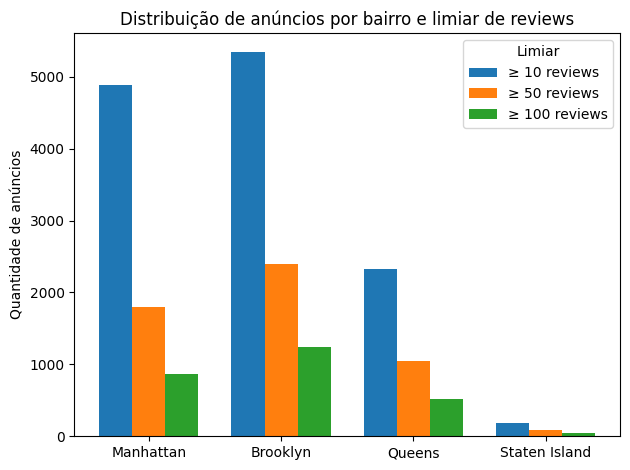

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bairros_para_analisar = ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island']

# Contagens cumulativas por limiar
contagem_10  = df[(df['numero_reviews'] >= 10)  & (df['bairro'].isin(bairros_para_analisar))]['bairro'].value_counts()
contagem_50  = df[(df['numero_reviews'] >= 50)  & (df['bairro'].isin(bairros_para_analisar))]['bairro'].value_counts()
contagem_100 = df[(df['numero_reviews'] >= 100) & (df['bairro'].isin(bairros_para_analisar))]['bairro'].value_counts()

# Alinha índices (preenche ausências com 0)
s_10  = contagem_10.reindex(bairros_para_analisar, fill_value=0)
s_50  = contagem_50.reindex(bairros_para_analisar, fill_value=0)
s_100 = contagem_100.reindex(bairros_para_analisar, fill_value=0)

# Plot (barras agrupadas)
x = np.arange(len(bairros_para_analisar))
w = 0.25

fig, ax = plt.subplots()

ax.bar(x - w, s_10.values,   width=w, label='≥ 10 reviews')
ax.bar(x,      s_50.values,  width=w, label='≥ 50 reviews')
ax.bar(x + w,  s_100.values, width=w, label='≥ 100 reviews')

ax.set_xticks(x)
ax.set_xticklabels(bairros_para_analisar)
ax.set_ylabel('Quantidade de anúncios')
ax.set_title('Distribuição de anúncios por bairro e limiar de reviews')
ax.legend(title='Limiar')

plt.tight_layout()
plt.show()


In [ ]:
# Tipo de acomodação preferida

quarto_particular = df['acomodacao'].value_counts()
print(quarto_particular)

acomodacao
Entire home/apt    19435
Private room       16346
Hotel room           335
Shared room          206
Name: count, dtype: int64
